# Decision Trees and Random Forests

## Monte Carlo simulation of Game of Dice

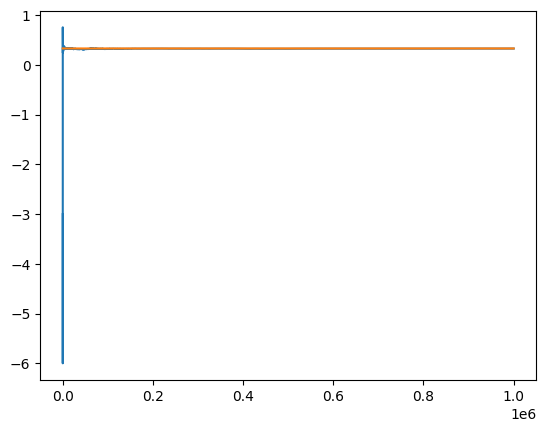

In [1]:
import matplotlib.pyplot as plt
import random
from itertools import accumulate

ROLLS = 1_000_000

roll_dice = lambda : random.randint(1, 6)
outcome = lambda i: -3 if i == 6 else 1

x = [x for x in range(ROLLS)]

y = [outcome(roll_dice()) for _ in range(ROLLS)]
y = accumulate(y)
y = [y/i if not i == 0 else y for i, y in enumerate(y)]

plt.plot(x, y)
plt.plot(x, [1/3 for _ in range(ROLLS)])

## Chaos (Surprise) as a function of probability

Text(0, 0.5, 'Surprise')

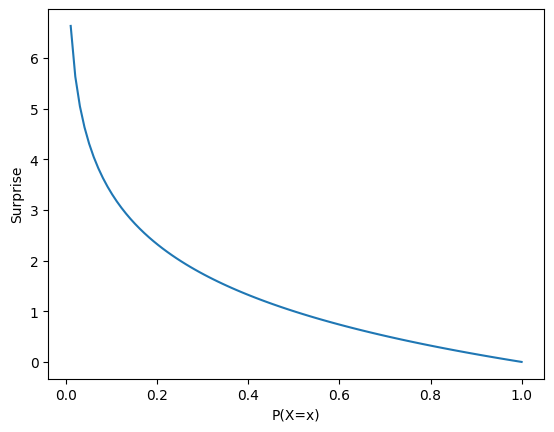

In [2]:
import numpy as np
import matplotlib.pyplot as plt

surprise = lambda x: np.log2(1/x) if not x == 0 else np.inf

x = np.linspace(0, 1, 100)

y = np.vectorize(surprise)(x)

plt.plot(x,y)
plt.xlabel('P(X=x)')
plt.ylabel('Surprise')

## Entropy and Gini impurity plot

In [3]:
COINS = 100

In [4]:
heads = (np.random.rand(COINS) * 100).astype(int)
heads

array([86, 41, 36, 54, 24, 85, 21, 45, 15, 21, 66, 78, 82, 10, 29, 29,  3,
       66, 66, 86, 69, 52, 59, 85, 63, 50, 11, 38, 27, 92, 83, 50, 17, 91,
       75, 48,  0, 79,  4, 56, 59, 38, 18,  8, 48, 17, 51, 40, 39,  6, 15,
       95,  6,  9, 54, 35, 93, 80, 27,  3, 33, 65,  3, 80, 74,  7, 89, 30,
       18, 14, 70, 75, 41, 24, 87, 83, 98, 88, 47, 15, 62, 85, 66, 30, 83,
       42, 43, 82, 84, 15, 57, 23, 22,  2, 45, 64, 13, 59, 47, 39])

In [5]:
tails = 100 - heads
tails

array([ 14,  59,  64,  46,  76,  15,  79,  55,  85,  79,  34,  22,  18,
        90,  71,  71,  97,  34,  34,  14,  31,  48,  41,  15,  37,  50,
        89,  62,  73,   8,  17,  50,  83,   9,  25,  52, 100,  21,  96,
        44,  41,  62,  82,  92,  52,  83,  49,  60,  61,  94,  85,   5,
        94,  91,  46,  65,   7,  20,  73,  97,  67,  35,  97,  20,  26,
        93,  11,  70,  82,  86,  30,  25,  59,  76,  13,  17,   2,  12,
        53,  85,  38,  15,  34,  70,  17,  58,  57,  18,  16,  85,  43,
        77,  78,  98,  55,  36,  87,  41,  53,  61])

In [6]:
entropy = lambda x, y: -(x/(x+y) * np.log2(x/(x+y)) + y/(x+y) * np.log2(y/(x+y)))
entropy(heads, tails)

/tmp/ipykernel_22378/1221933000.py:1: RuntimeWarning: divide by zero encountered in log2
  entropy = lambda x, y: -(x/(x+y) * np.log2(x/(x+y)) + y/(x+y) * np.log2(y/(x+y)))
/tmp/ipykernel_22378/1221933000.py:1: RuntimeWarning: invalid value encountered in multiply
  entropy = lambda x, y: -(x/(x+y) * np.log2(x/(x+y)) + y/(x+y) * np.log2(y/(x+y)))


array([0.58423881, 0.97650047, 0.94268319, 0.99537844, 0.79504028,
       0.6098403 , 0.74148274, 0.99277445, 0.6098403 , 0.74148274,
       0.9248187 , 0.7601675 , 0.68007705, 0.46899559, 0.86872125,
       0.86872125, 0.19439186, 0.9248187 , 0.9248187 , 0.58423881,
       0.89317346, 0.99884554, 0.97650047, 0.6098403 , 0.95067209,
       1.        , 0.49991596, 0.95804202, 0.84146464, 0.40217919,
       0.65770478, 1.        , 0.65770478, 0.43646982, 0.81127812,
       0.99884554,        nan, 0.74148274, 0.24229219, 0.98958752,
       0.97650047, 0.95804202, 0.68007705, 0.40217919, 0.99884554,
       0.65770478, 0.99971144, 0.97095059, 0.96479955, 0.32744492,
       0.6098403 , 0.28639696, 0.32744492, 0.43646982, 0.99537844,
       0.93406806, 0.36592365, 0.72192809, 0.84146464, 0.19439186,
       0.91492637, 0.93406806, 0.19439186, 0.72192809, 0.82674637,
       0.36592365, 0.49991596, 0.8812909 , 0.68007705, 0.58423881,
       0.8812909 , 0.81127812, 0.97650047, 0.79504028, 0.55743

In [7]:
gini = lambda x, y: 1 - ((x/(x+y))**2 + (y/(x+y))**2)
gini(heads, tails)

array([0.2408, 0.4838, 0.4608, 0.4968, 0.3648, 0.255 , 0.3318, 0.495 ,
       0.255 , 0.3318, 0.4488, 0.3432, 0.2952, 0.18  , 0.4118, 0.4118,
       0.0582, 0.4488, 0.4488, 0.2408, 0.4278, 0.4992, 0.4838, 0.255 ,
       0.4662, 0.5   , 0.1958, 0.4712, 0.3942, 0.1472, 0.2822, 0.5   ,
       0.2822, 0.1638, 0.375 , 0.4992, 0.    , 0.3318, 0.0768, 0.4928,
       0.4838, 0.4712, 0.2952, 0.1472, 0.4992, 0.2822, 0.4998, 0.48  ,
       0.4758, 0.1128, 0.255 , 0.095 , 0.1128, 0.1638, 0.4968, 0.455 ,
       0.1302, 0.32  , 0.3942, 0.0582, 0.4422, 0.455 , 0.0582, 0.32  ,
       0.3848, 0.1302, 0.1958, 0.42  , 0.2952, 0.2408, 0.42  , 0.375 ,
       0.4838, 0.3648, 0.2262, 0.2822, 0.0392, 0.2112, 0.4982, 0.255 ,
       0.4712, 0.255 , 0.4488, 0.42  , 0.2822, 0.4872, 0.4902, 0.2952,
       0.2688, 0.255 , 0.4902, 0.3542, 0.3432, 0.0392, 0.495 , 0.4608,
       0.2262, 0.4838, 0.4982, 0.4758])

/tmp/ipykernel_22378/1385318607.py:1: RuntimeWarning: invalid value encountered in divide
  plt.scatter((heads/heads+tails), entropy(heads, tails), label='entropy')
/tmp/ipykernel_22378/1221933000.py:1: RuntimeWarning: divide by zero encountered in log2
  entropy = lambda x, y: -(x/(x+y) * np.log2(x/(x+y)) + y/(x+y) * np.log2(y/(x+y)))
/tmp/ipykernel_22378/1221933000.py:1: RuntimeWarning: invalid value encountered in multiply
  entropy = lambda x, y: -(x/(x+y) * np.log2(x/(x+y)) + y/(x+y) * np.log2(y/(x+y)))
/tmp/ipykernel_22378/1385318607.py:2: RuntimeWarning: invalid value encountered in divide
  plt.scatter((heads/heads+tails), gini(heads, tails), label='gini')


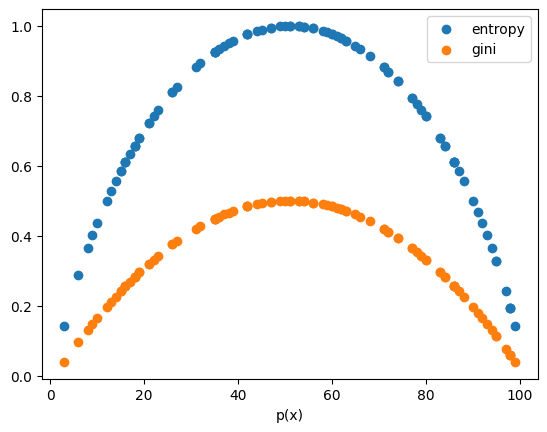

In [8]:
plt.scatter((heads/heads+tails), entropy(heads, tails), label='entropy')
plt.scatter((heads/heads+tails), gini(heads, tails), label='gini')
plt.xlabel('p(x)')
plt.legend()
plt.show()

## Desicion Trees

In [9]:
import numpy as np
from sklearn import datasets

In [10]:
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [11]:
y = iris.target
y.shape

(150,)

In [12]:
labels = iris.target_names
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

In [ ]:
models = [
    ('Decision Tree', DecisionTreeClassifier()),    
]

In [15]:
import utils
import utils

for name, model in models:
   print(f'** {name}')
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   val_pred = model.predict(X_val)
   print(utils.evaluate(train_pred, y_train)['f-score'])
   print(utils.evaluate(val_pred, y_val)['f-score'])

** Decision Tree
1.0
0.888888888888889


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

models = [
    ('Random Forest', RandomForestClassifier()),    
]

In [17]:
import utils
import utils

for name, model in models:
   print(f'** {name}')
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   val_pred = model.predict(X_val)
   print(utils.evaluate(train_pred, y_train)['f-score'])
   print(utils.evaluate(val_pred, y_val)['f-score'])

** Random Forest
1.0
1.0


## Decision Tree vs Random Forest

In [18]:
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier())    
]

In [19]:
import utils
import utils

for name, model in models:
   print(f'** {name}')
   model.fit(X_train, y_train)
   train_pred = model.predict(X_train)
   val_pred = model.predict(X_val)
   print(utils.evaluate(train_pred, y_train)['f-score'])
   print(utils.evaluate(val_pred, y_val)['f-score'])

** Decision Tree
1.0
0.888888888888889
** Random Forest
1.0
1.0


## XGBClassifier

In [20]:
from xgboost import XGBClassifier

In [21]:
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [22]:
preds == y_test

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])